In [1]:
# ---- Reproducibility
import random
import torch

seed = 1234
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.0369924  0.12349849 0.01266485 ... 0.20919041 0.20178125 0.15269329]
 [0.01256629 0.04195233 0.00430224 ... 0.0710618  0.06854491 0.05186978]
 [0.07442166 0.24845541 0.02547927 ... 0.42085123 0.40594542 0.3071898 ]
 ...
 [0.13003676 0.43412546 0.04451985 ... 0.73535219 0.70930731 0.53675188]
 [0.02568535 0.08575008 0.00879373 ... 0.14524951 0.14010503 0.10602124]
 [0.01213768 0.04052142 0.0041555  ... 0.06863803 0.06620699 0.05010061]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.14788041  0.16955928  0.1824038  ...  0.06284919  0.26615598
   0.04153663]
 [-0.07975735  0.07738678 -0.06536086 ...  0.08710195  0.01799688
   0.10035783]
 [ 0.15693369  0.13496091 -0.12057474 ...  0.40187727  0.53974668
   0.3314774 ]
 ...
 [ 0.16086152  0.64130937  0.12866035 ...  0.67670073  0.59595961
   0.57849158]
 [-0.06675871 -0.03323521 -0.03429034 ...  0.1487228   0.2078188
   0.18898802]
 [-0.14480705  0.07884231  0.03359961 ... -0.16932926  0.1779711
   0.1486

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix,
                prior_L="point_laplace",
                  prior_F="point_laplace") 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([ 0.0080, -0.1905,  0.2605, -0.2120,  0.2116,  0.1896, -0.2458, -0.2640,
         0.1057,  0.1225,  0.0676,  0.0620, -0.0016,  0.1750,  0.1087, -0.0761,
         0.1078, -0.4832,  0.0641,  0.1960, -0.2287, -0.0704, -0.2441,  0.0377,
        -0.2611, -0.1291,  0.3901, -0.0387, -0.1331, -0.2875, -0.2095,  0.1439,
        -0.0307, -0.0648,  0.0598, -0.0430,  0.1896,  0.1109,  0.0643, -0.0023,
        -0.0328, -0.2137,  0.0720,  0.0039, -0.1591, -0.2714, -0.0136,  0.1367,
         0.0542,  0.2452])
tensor([ 0.0610,  0.0381, -0.0373,  0.1844, -0.0388, -0.1764,  0.0488, -0.3281,
        -0.0793,  0.0009,  0.2299,  0.1970,  0.0735, -0.2066,  0.0725, -0.2878,
        -0.0727,  0.3067, -0.2505,  0.0539,  0.1928,  0.0201, -0.0158,  0.1157,
         0.1509,  0.0815,  0.0377,  0.1380,  0.1188, -0.1703, -0.0225, -0.0766,
        -0.2759,  0.2154,  0.2396, -0.1764, -0.0045, -0.1609,  0.1603,  0.0669])


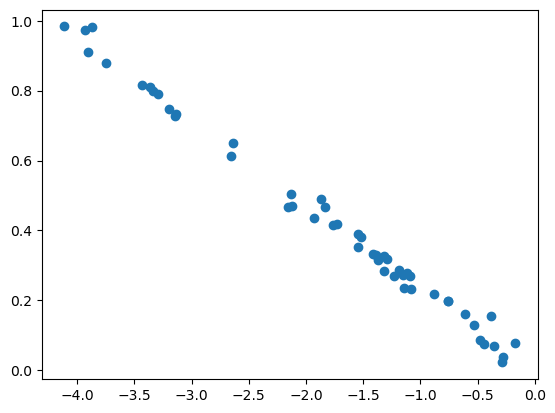

In [6]:
plt.scatter( mycebmf.L[:,0],u)

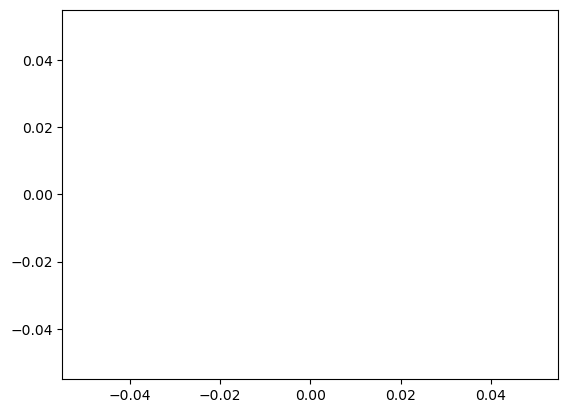

In [7]:
mycebmf.iter_once()  
mycebmf.update_fitted_value()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [8]:
mycebmf.update_fitted_value()

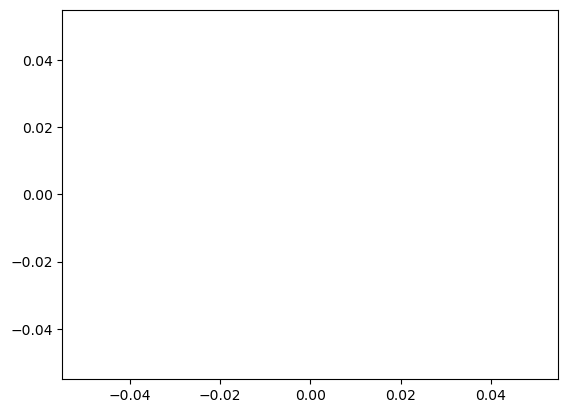

In [9]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [10]:
from cebmf_torch.torch_main import *
mycebmf=  cEBMF(data= noisy_matrix,
                prior_L="point_laplace",
                  prior_F="point_laplace") 
mycebmf.initialize()
k=0

In [11]:


mycebmf.L

tensor([[-1.0800e+00,  8.0196e-03,  1.5701e-01,  2.6303e-01, -4.1739e-02],
        [-1.7109e-01, -1.9046e-01,  1.4650e-01,  3.7131e-02,  8.8875e-02],
        [-2.1563e+00,  2.6045e-01, -2.9440e-01,  5.0543e-02, -4.6051e-02],
        [-1.7606e+00, -2.1199e-01,  2.5109e-01, -1.1951e-02,  2.4847e-01],
        [-1.5449e+00,  2.1157e-01,  9.9516e-02,  2.0594e-01, -2.2076e-01],
        [-1.2314e+00,  1.8960e-01, -1.3784e-01,  5.0737e-02,  2.0818e-02],
        [-7.6256e-01, -2.4581e-01,  2.3146e-03,  7.5396e-02, -4.0319e-01],
        [-1.1439e+00, -2.6397e-01,  1.8187e-01, -8.0567e-02, -8.1205e-03],
        [-1.0905e+00,  1.0566e-01,  2.1918e-02,  2.5164e-01,  1.1956e-01],
        [-3.9036e+00,  1.2250e-01,  1.1006e-02,  8.3848e-02, -1.0205e-01],
        [-3.3608e+00,  6.7632e-02, -1.3782e-01, -1.8388e-01, -7.9343e-02],
        [-2.8256e-01,  6.1964e-02,  1.6782e-01, -1.5000e-01,  3.2100e-01],
        [-3.1371e+00, -1.5682e-03,  1.2186e-01,  1.8391e-01, -6.9569e-02],
        [-2.6537e+00,  1.

In [12]:

k=0
Rk = mycebmf._partial_residual_masked(k)            # (N,P), zeros where missing
fk  = mycebmf.F[:, k]                                # (P,)
fk2 = mycebmf.F2[:, k]                               # (P,)

eps = 1e-12
denom_l = (fk2.view(1, -1) * mycebmf.mask).sum(dim=1).clamp_min(eps)     # (N,)
num_l   = (Rk @ fk)                                                   # (N,)
se_l    = torch.sqrt(1.0 / (mycebmf.tau * denom_l))


lhat = num_l / denom_l

resL = mycebmf.prior_L_fn(
            X=getattr(mycebmf, "X_l", None),
            betahat=lhat,
            sebetahat=se_l,
            model_param=mycebmf.model_state_L[k]
)
mycebmf.model_state_L[k] = resL.model_param
mycebmf.L[:, k]  = resL.post_mean
mycebmf.L2[:, k] = resL.post_mean2
mycebmf.kl_l[k]  = torch.as_tensor(resL.loss, device=mycebmf.device)

In [13]:
se_l
resL.post_mean

tensor([-1.0765, -0.1677, -2.1528, -1.7571, -1.5414, -1.2279, -0.7591, -1.1404,
        -1.0870, -3.9001, -3.3573, -0.2791, -3.1336, -2.6503, -1.1478, -1.3878,
        -1.3705, -0.7536, -3.1936, -2.6340, -1.1820, -1.4088, -1.5150, -1.5416,
        -0.3535, -0.2847, -2.1171, -1.2851, -3.7460, -1.8343, -3.9300, -1.3176,
        -3.3294, -1.9285, -1.3118, -3.8649, -0.4772, -0.5282, -2.1236, -1.1146,
        -1.8642, -1.7260, -4.1079, -0.3795, -3.2943, -0.8741, -3.1453, -3.4261,
        -0.6084, -0.4414], dtype=torch.float64)

In [14]:
lhat+1

tensor([-0.0800,  0.8289, -1.1563, -0.7606, -0.5449, -0.2314,  0.2374, -0.1439,
        -0.0905, -2.9036, -2.3608,  0.7174, -2.1371, -1.6537, -0.1513, -0.3913,
        -0.3740,  0.2429, -2.1971, -1.6375, -0.1854, -0.4123, -0.5185, -0.5451,
         0.6430,  0.7118, -1.1206, -0.2886, -2.7495, -0.8378, -2.9335, -0.3211,
        -2.3329, -0.9320, -0.3153, -2.8683,  0.5193,  0.4683, -1.1271, -0.1181,
        -0.8677, -0.7295, -3.1114,  0.6170, -2.2977,  0.1224, -2.1488, -2.4296,
         0.3881,  0.5552])

In [15]:
se_l


tensor([0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792,
        0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792,
        0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792,
        0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792,
        0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792, 0.0792,
        0.0792, 0.0792, 0.0792, 0.0792, 0.0792])

In [16]:
from cebmf_torch.torch_ebnm_point_laplace import ebnm_point_laplace
lol= ebnm_point_laplace(lhat , se_l) 

In [17]:
lol.a

0.5569178462028503

In [18]:
# make sure this is the stable version we discussed
from cebmf_torch.torch_ebnm_point_exp import ebnm_point_exp
res = ebnm_point_exp(
    x=lhat.float(),
    s=se_l.float() 
) 
res.post_mean  # shrunk toward 0, not all zero


tensor([2.2707e-09, 5.4210e-08, 5.8578e-10, 8.7363e-10, 1.1294e-09, 1.7596e-09,
        4.4278e-09, 2.0309e-09, 2.2284e-09, 1.8056e-10, 2.4313e-10, 2.5888e-08,
        2.7877e-10, 3.8847e-10, 2.0057e-09, 1.3866e-09, 1.4209e-09, 4.4883e-09,
        2.6850e-10, 3.9324e-10, 1.8950e-09, 1.3467e-09, 1.1684e-09, 1.1292e-09,
        1.7575e-08, 2.5074e-08, 6.0539e-10, 1.6107e-09, 1.9558e-10, 8.0290e-10,
        1.7787e-10, 1.5342e-09, 2.4721e-10, 7.2759e-10, 1.5475e-09, 1.8385e-10,
        1.0421e-08, 8.6760e-09, 6.0176e-10, 2.1231e-09, 7.7770e-10, 9.0482e-10,
        1.6288e-10, 1.5570e-08, 2.5248e-10, 3.3871e-09, 2.7672e-10, 2.3357e-10,
        6.6967e-09, 1.1972e-08], dtype=torch.float64)

In [19]:
from cebmf_torch.torch_ash import ash
chk = ash(lhat.float(), se_l.float(), prior="norm")
chk.post_mean  # finite; should be close to lhat for large SNR


tensor([-1.0784, -0.1156, -2.1531, -1.7580, -1.5426, -1.2296, -0.7614, -1.1422,
        -1.0889, -3.8980, -3.3559, -0.2798, -3.1325, -2.6499, -1.1496, -1.3893,
        -1.3720, -0.7560, -3.1924, -2.6336, -1.1837, -1.4102, -1.5162, -1.5428,
        -0.3564, -0.2859, -2.1175, -1.2867, -3.7441, -1.8351, -3.9278, -1.3192,
        -3.3281, -1.9292, -1.3134, -3.8627, -0.4800, -0.5309, -2.1240, -1.1164,
        -1.8650, -1.7269, -4.1054, -0.3824, -3.2929, -0.8763, -3.1442, -3.4246,
        -0.6110, -0.4442])

In [20]:

k=1
Rk = mycebmf._partial_residual_masked(k)            # (N,P), zeros where missing
fk  = mycebmf.F[:, k]                                # (P,)
fk2 = mycebmf.F2[:, k]                               # (P,)

eps = 1e-12
denom_l = (fk2.view(1, -1) * mycebmf.mask).sum(dim=1).clamp_min(eps)     # (N,)
num_l   = (Rk @ fk)                                                   # (N,)
se_l    = torch.sqrt(1.0 / (mycebmf.tau * denom_l))


lhat = num_l / denom_l

resL = mycebmf.prior_L_fn(
            X=getattr(mycebmf, "X_l", None),
            betahat=lhat,
            sebetahat=se_l,
            model_param=mycebmf.model_state_L[k]
)
mycebmf.model_state_L[k] = resL.model_param
mycebmf.L[:, k]  = resL.post_mean
mycebmf.L2[:, k] = resL.post_mean2
mycebmf.kl_l[k]  = torch.as_tensor(resL.loss, device=mycebmf.device)
se_l
resL.post_mean

tensor([ 0.0048, -0.1406,  0.2081, -0.1608,  0.1604,  0.1398, -0.1937, -0.2116,
         0.0690,  0.0819,  0.0422,  0.0384, -0.0009,  0.1264,  0.0713, -0.0479,
         0.0706, -0.4305,  0.0398,  0.1458, -0.1769, -0.0440, -0.1919,  0.0229,
        -0.2087, -0.0872,  0.3374, -0.0236, -0.0904, -0.2350, -0.1585,  0.0994,
        -0.0186, -0.0403,  0.0370, -0.0262,  0.1398,  0.0730,  0.0399, -0.0014,
        -0.0199, -0.1625,  0.0451,  0.0023, -0.1124, -0.2189, -0.0082,  0.0933,
         0.0334,  0.1931], dtype=torch.float64)